# 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 한글폰트 출력을 위한 코드
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()
    # mac OS 일때
    if system_name == 'Darwin' :
        font_faimly = 'AppleGothic'
    # 윈도우일떄 
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family

# style 설정은 꼭 폰트설정 위에서 한다. 
# style에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 깨진다.
# plt.style.use('seaborn')

#폰트설정
plt.rc('font', family=get_font_family())

#마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
# 그래프 해상도 
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'

# 데이터셋

- 데이터셋 설명
    - 2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터
- 크기
    - 600 rows
    - 12개 컬럼
- 컬럼 설명
    - title : 영화의 제목
    - distributor : 배급사
    - genre : 장르
    - release_time : 개봉일
    - time : 상영시간(분)
    - screening_rat : 상영등급
    - director : 감독이름
    - dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
    - dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
    - num_staff : 스텝수
    - num_actor : 주연배우수
    - box_off_num : 관객수

In [3]:
df = pd.read_csv('./input/movies_train.csv')
print(df.shape)
df.head()

(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# EDA

## 기본 분석

### 자료형 및 결측치 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


- 결측치 확인 
    - dir_prev_bfnum : 감독의 이전작 평균 관객 수 에서 330개의 결측치 발견 

In [5]:
df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

### 기본 통계데이터 확인

In [6]:
df.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


## 단일컬럼 분석

### `title` : 제목

In [7]:
df['title'].nunique()

600

### `distributor` : 배급사

- 문자열 전처리
    - 고유값 축소 169->159

In [8]:
df['distributor'].nunique()

169

In [71]:
# (주) 유무, 공백 유무에 따라 갈리는 경우 제거
# 이후 정규표현식 이용해서 제거
df['distributor'] = df['distributor'].str.replace('\(주\)', '')
df['distributor'] = df['distributor'].str.replace(' ', '')
df['distributor'].nunique()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_24332/1518922650.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['distributor'] = df['distributor'].str.replace('\(주\)', '')


159

- 배급사별 영화 수

In [76]:
df.value_counts('distributor').head(10).reset_index(name='count')

,distributor,count
0,CJ엔터테인먼트,54
1,롯데엔터테인먼트,52
2,NEW,38
3,마운틴픽쳐스,29
4,인디스토리,26
5,쇼박스,26
6,시네마달,18
7,골든타이드픽처스,15
8,케이알씨지,14
9,어뮤즈,10


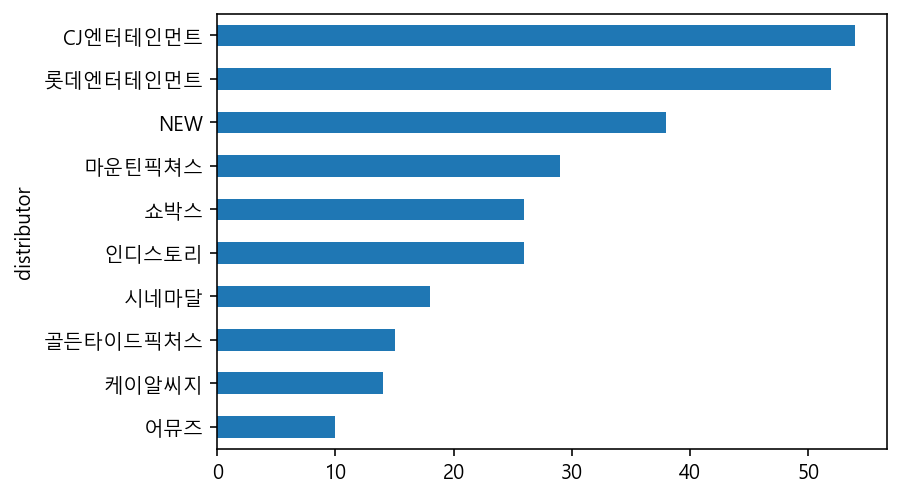

In [73]:
# 시각화
grouped = df.value_counts('distributor').head(10).sort_values()
grouped.plot(kind='barh');

### `genre` : 장르

- 드라마 -> 다큐 -> 멜로 -> 코미디 -> 공포 순
- 드라마의 정의는 뭐지?
    - 현실에서 있을법한 이야기?
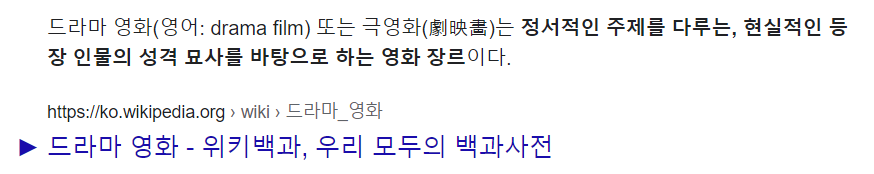

In [13]:
df.value_counts('genre')

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
dtype: int64

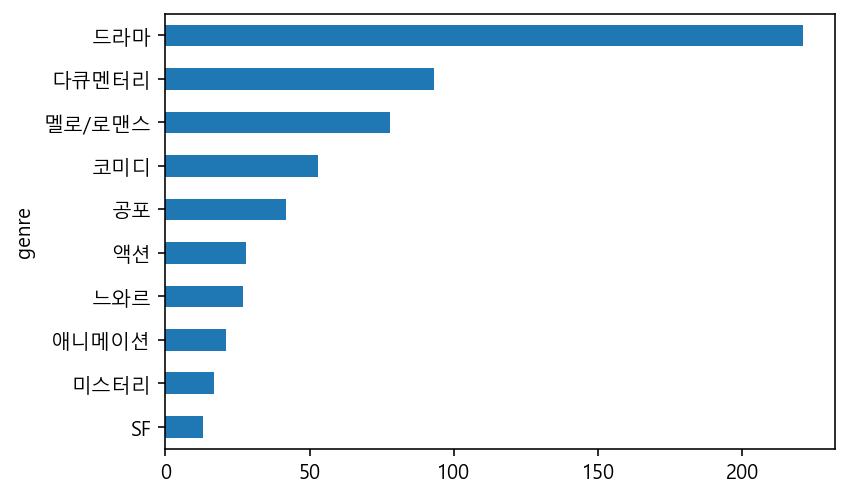

In [14]:
grouped = df.value_counts('genre').head(10).sort_values()
grouped.plot(kind='barh');

### `release_time` :개봉일
    

In [15]:
df['release_time'].head()

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object

- datetime 자료형으로 변경

In [16]:
# 데이트타임 변경 
df['release_time'] = pd.to_datetime(df['release_time'])
df['release_time'].head()

0   2012-11-22
1   2015-11-19
2   2013-06-05
3   2012-07-12
4   2010-11-04
Name: release_time, dtype: datetime64[ns]

In [17]:
# 컬럼생성 - 년도 추출
df['release_year'] = df['release_time'].dt.year
df['release_year'].head()

0    2012
1    2015
2    2013
3    2012
4    2010
Name: release_year, dtype: int64

- 연도별
    - 2014년에 가장 많은 영화 개봉

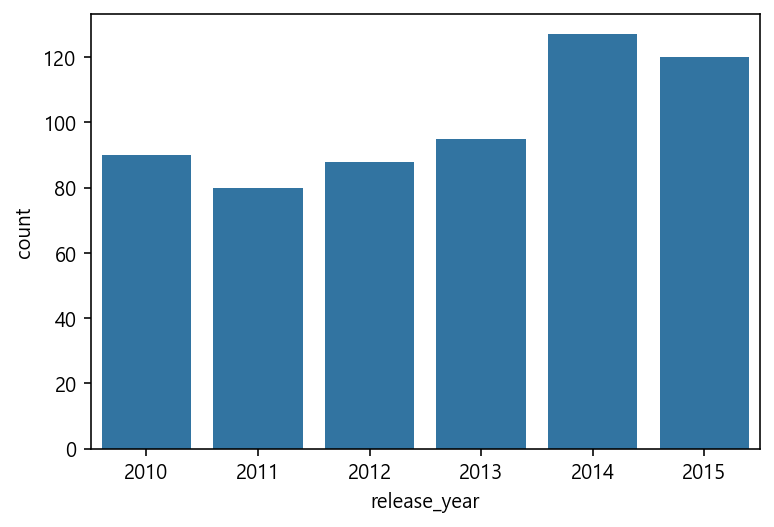

In [77]:
# 년도별 개봉영화수
x = 'release_year'

sns.countplot(x=x, data=df, color='#1f77b4')
plt.show()

### `time` : 상영시간

In [85]:
# 통계치 확인
df['time'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
time,600.00000,100.86333,18.09753,45.00000,89.00000,100.00000,114.00000,180.00000


- 상영시간 100분 내외의 영화가 가장 많이 개봉했다.
    - 영화가 너무 길면 집중력 떨어진다?
    - 영화가 너무 짧으면 돈내고 영화관가서 보기 아깝다?

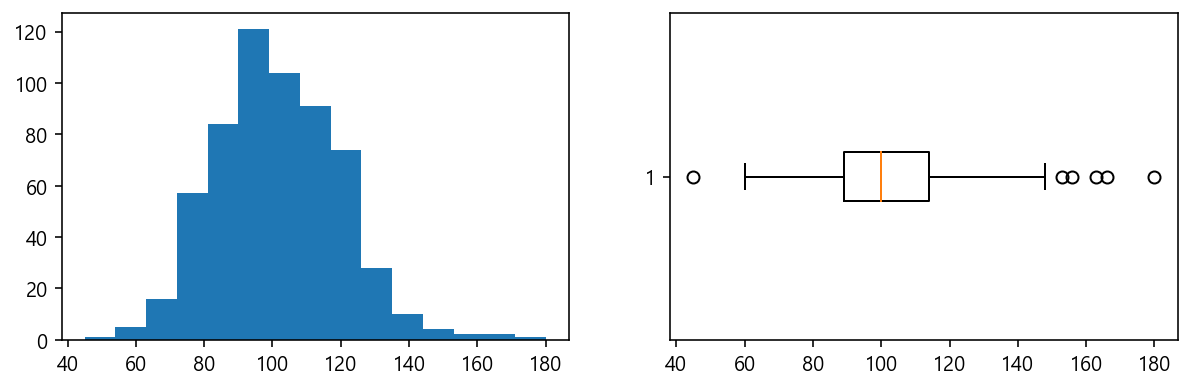

In [200]:
#시각화
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].hist(df['time'], bins=15)
ax[1].boxplot(df['time'], vert=0)
plt.show()

### `screening_rat` : 상영등급

- 청불 영화가 제일 많다?

In [22]:
df['screening_rat'].value_counts().reset_index()

,index,screening_rat
0,청소년 관람불가,204
1,15세 관람가,202
2,12세 관람가,102
3,전체 관람가,92


<AxesSubplot:xlabel='screening_rat', ylabel='box_off_num'>

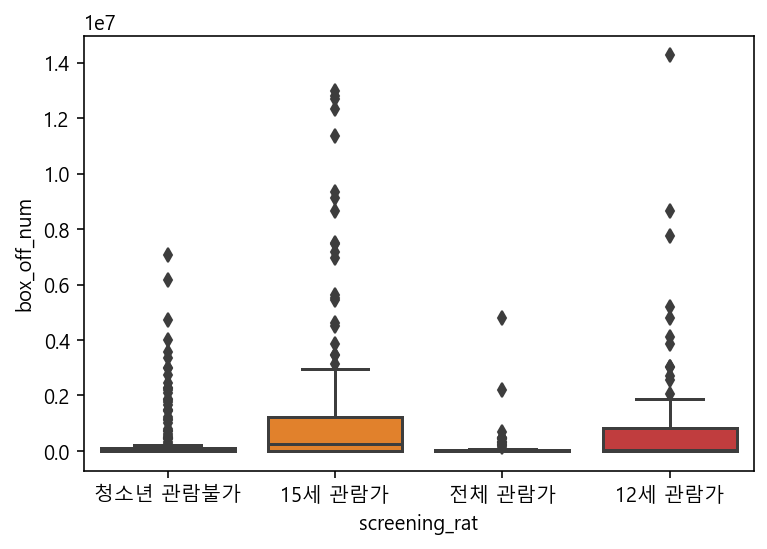

In [201]:
sns.boxplot(x='screening_rat', y='box_off_num', data=df)

### `director` : 감독

- 홍상수, 신재호, 우민호, 장률
- 영화 여러개 출품한 감독의 주기는 얼마나? 
    - 이거 이항분포? 

In [23]:
df.value_counts('director').head(10)

director
홍상수    7
신재호    4
우민호    4
장률     4
노진수    4
전규환    4
전수일    3
권칠인    3
김기덕    3
장진     3
dtype: int64

### `dir_prev_bfnum` : 전작 평균 관객 수
- 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

In [24]:
df['dir_prev_bfnum']

0             NaN
1      1161602.50
2       220775.25
3        23894.00
4            1.00
          ...    
595       3833.00
596     496061.00
597           NaN
598           NaN
599           NaN
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [111]:
# 결측치 0으로 대체
# 전작이 없는 경우
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0)
df['dir_prev_bfnum']

0           0.00000
1     1161602.50000
2      220775.25000
3       23894.00000
4           1.00000
           ...     
595      3833.00000
596    496061.00000
597         0.00000
598         0.00000
599         0.00000
Name: dir_prev_bfnum, Length: 600, dtype: float64

- 없는 경우가 대부분
    - 없는 경우 데뷔감독이라고 보고
    - 데뷔작이 아닌경우에 대해서 분석 필요 
    - 다음 컬럼에서 구분하는 컬럼 생성해보자

<AxesSubplot:>

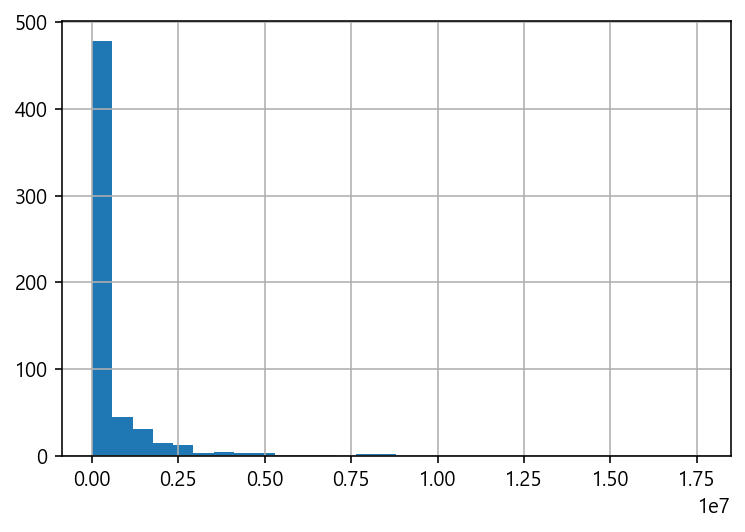

In [117]:
df['dir_prev_bfnum'].hist(bins=30)

### `dir_prev_num` : 감독의 전작 개수
- 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

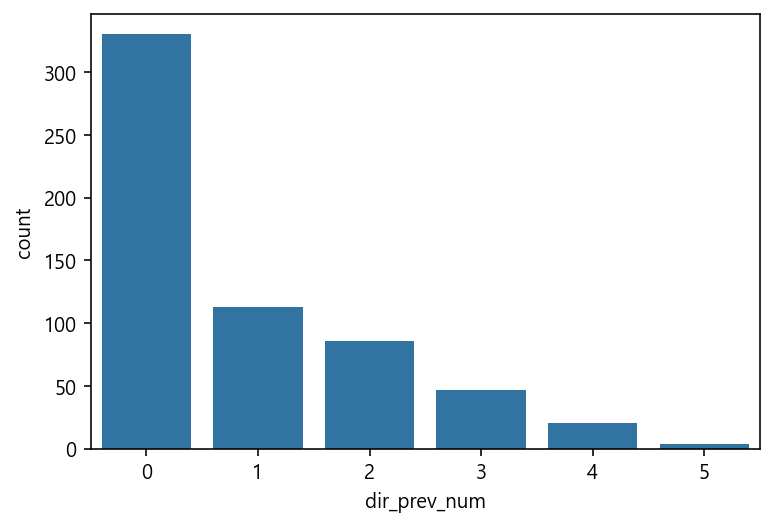

In [129]:
sns.countplot(x='dir_prev_num', data=df, color='#1f77b4');

- 전작 유무 컬럼 생성 (전작의 기록이 없는 경우 0으로 간주)
    - 데뷔작 : 0
    - 그 외 : 1
- 데뷔작인 경우 스태프 수가 많은가?

In [146]:
cond = df['dir_prev_num'] == 0
df['dir_prev_num_yn'] = np.where(cond, 0, 1)

### `num_staff` : 스태프 수
    - 스태프 수가 큰 경우 관객 수 높나?
    - 어떤 감독의 몇 명의 스태프를 고용하나? 
    - 회사별 스태프 수 boxplot?
   

<AxesSubplot:>

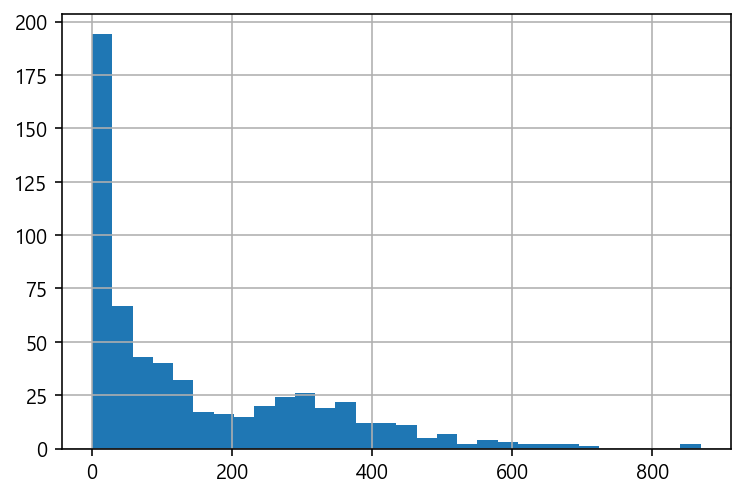

In [150]:
# 2가지 mode
df['num_staff'].hist(bins=30)

### `num_actor` : 주연배우수

<AxesSubplot:>

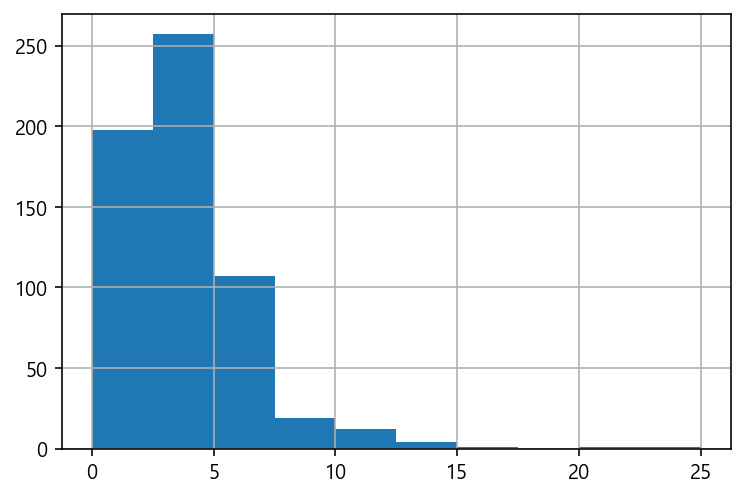

In [28]:
df['num_actor'].hist()

In [153]:
df.sort_values('num_actor', ascending=False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,outlier_yn,s_genre,dir_prev_num_yn
80,바비,케이알씨지,드라마,2010-02-04,116,15세 관람가,에밀리오 에스테베즈,0.00000,0,19,25,2821,2010,0,드라마,0
486,뷰티 인사이드,NEW,멜로/로맨스,2015-08-20,127,12세 관람가,백종열,4210890.33333,3,572,22,2057896,2015,1,멜로/로맨스,1
511,서울연애,서울독립영화제,드라마,2014-10-30,120,청소년 관람불가,최시형,0.00000,0,103,16,1547,2014,0,드라마,0
246,풍경,인디스토리,다큐멘터리,2013-12-12,96,전체 관람가,장률,0.00000,0,4,14,2178,2013,0,다큐멘터리,0
231,뒷담화: 감독이 미쳤어요,필라멘트픽쳐스,드라마,2013-02-28,85,12세 관람가,이재용,495068.50000,2,173,14,5317,2013,0,드라마,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,미국의 바람과 불,시네마달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,0.00000,0,6,0,652,2012,0,다큐멘터리,0
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,0.00000,0,10,0,79,2010,0,다큐멘터리,0
167,모래가 흐르는 강,시네마달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,0.00000,0,11,0,10942,2013,0,다큐멘터리,0
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,0.00000,0,3,0,1827,2015,0,다큐멘터리,0


### `box_off_num` : 관객수

In [30]:
  # 과학적 표기법 대신 소수점 5자리까지 나타낸다.
  pd.options.display.float_format = '{:.5f}'.format

In [31]:
df['box_off_num'].describe()

count        600.00000
mean      708181.75167
std      1828005.85114
min            1.00000
25%         1297.25000
50%        12591.00000
75%       479886.75000
max     14262766.00000
Name: box_off_num, dtype: float64

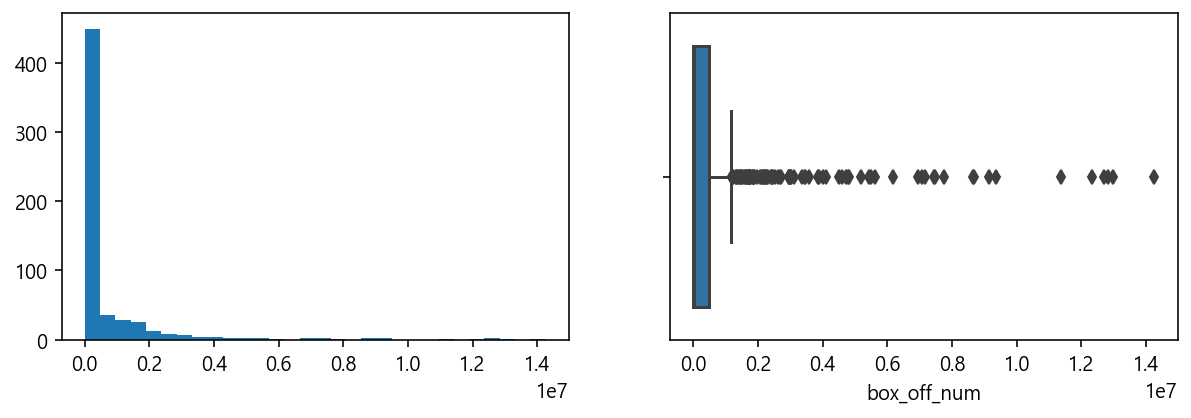

In [165]:
fig, ax = plt.subplots(1,2 , figsize=(10,3))
ax[0].hist(df['box_off_num'], bins=30)
sns.boxplot(x='box_off_num', data=df, ax=ax[1])
plt.show()

- 이상치 여/부에 따라 세그먼트를 나눠보자 

In [33]:
# IQR 계산
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3-Q1

# 이상치 기준 설정
Q1_whis = Q1 - (1.5 * IQR)
Q3_whis = Q3 + (1.5 * IQR)

# 마이너스는 없으니까 Q3수염 이상과 정상범주 2가지만 확인하면 되겠다 
print(Q1_whis, Q3_whis)

-716587.0 1197771.0


In [155]:
# 구분하기
# 정상범주 안의 영화
filter = (df['box_off_num'] <= Q3_whis)
df[filter].sort_values('box_off_num', ascending=False).head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,outlier_yn,s_genre,dir_prev_num_yn
48,빅매치,NEW,액션,2014-11-26,112,15세 관람가,최호,1159954.00000,2,600,4,1177435,2014,0,기타,1
156,슬로우 비디오,이십세기폭스코리아,드라마,2014-10-02,106,12세 관람가,김영탁,1764377.33333,3,261,2,1169546,2014,0,드라마,1
400,돈의 맛,시너지,드라마,2012-05-17,115,청소년 관람불가,임상수,1276480.00000,2,324,4,1166025,2012,0,드라마,1


In [156]:
# Q3_whis보다 큰영화 (이상치)
df[~filter].sort_values('box_off_num', ascending=False).head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,outlier_yn,s_genre,dir_prev_num_yn
372,국제시장,CJ엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.00000,0,869,4,14262766,2014,1,드라마,0
362,도둑들,쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.66667,3,462,10,12983841,2012,1,기타,1
530,7번방의 선물,NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435,2013,1,코미디,1


In [10]:
arr = df.value_counts('distributor').nlargest(10).index
cond = df['distributor'].isin(arr)
df_top10 = df[cond]
df_top10.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


- 천만관객 이상 확인

In [37]:
df[df['box_off_num']>=1e7]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year
122,변호인,NEW,드라마,2013-12-18,127,15세 관람가,양우석,0.00000,0,311,5,11374879,2013
362,도둑들,쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.66667,3,462,10,12983841,2012
372,국제시장,CJ엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.00000,0,869,4,14262766,2014
460,"광해, 왕이 된 남자",CJ엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.00000,2,402,3,12323595,2012
498,암살,쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.00000,4,628,3,12706663,2015
530,7번방의 선물,NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435,2013


- 관객수 기준 이상치 여부 컬럼 생성

In [38]:
df['outlier_yn'] = np.where(df['box_off_num'] > Q3_whis, 1, 0 )

## 컬럼간 분석

- 이상치(관객많은영화) vs 적은영화
    - time : 관객이 많은 영화의 상영시간이 상대적으로 길다
    - 스태프 수 : 관객이 많은 영화의 스태프수가 더 높은 분포를 보인다.
- 2012, 2013 년에 이상치(관객이 많은 영화)의 수가 많고
- 2014년, 2015년에 관객수 적은 영화가 많다.

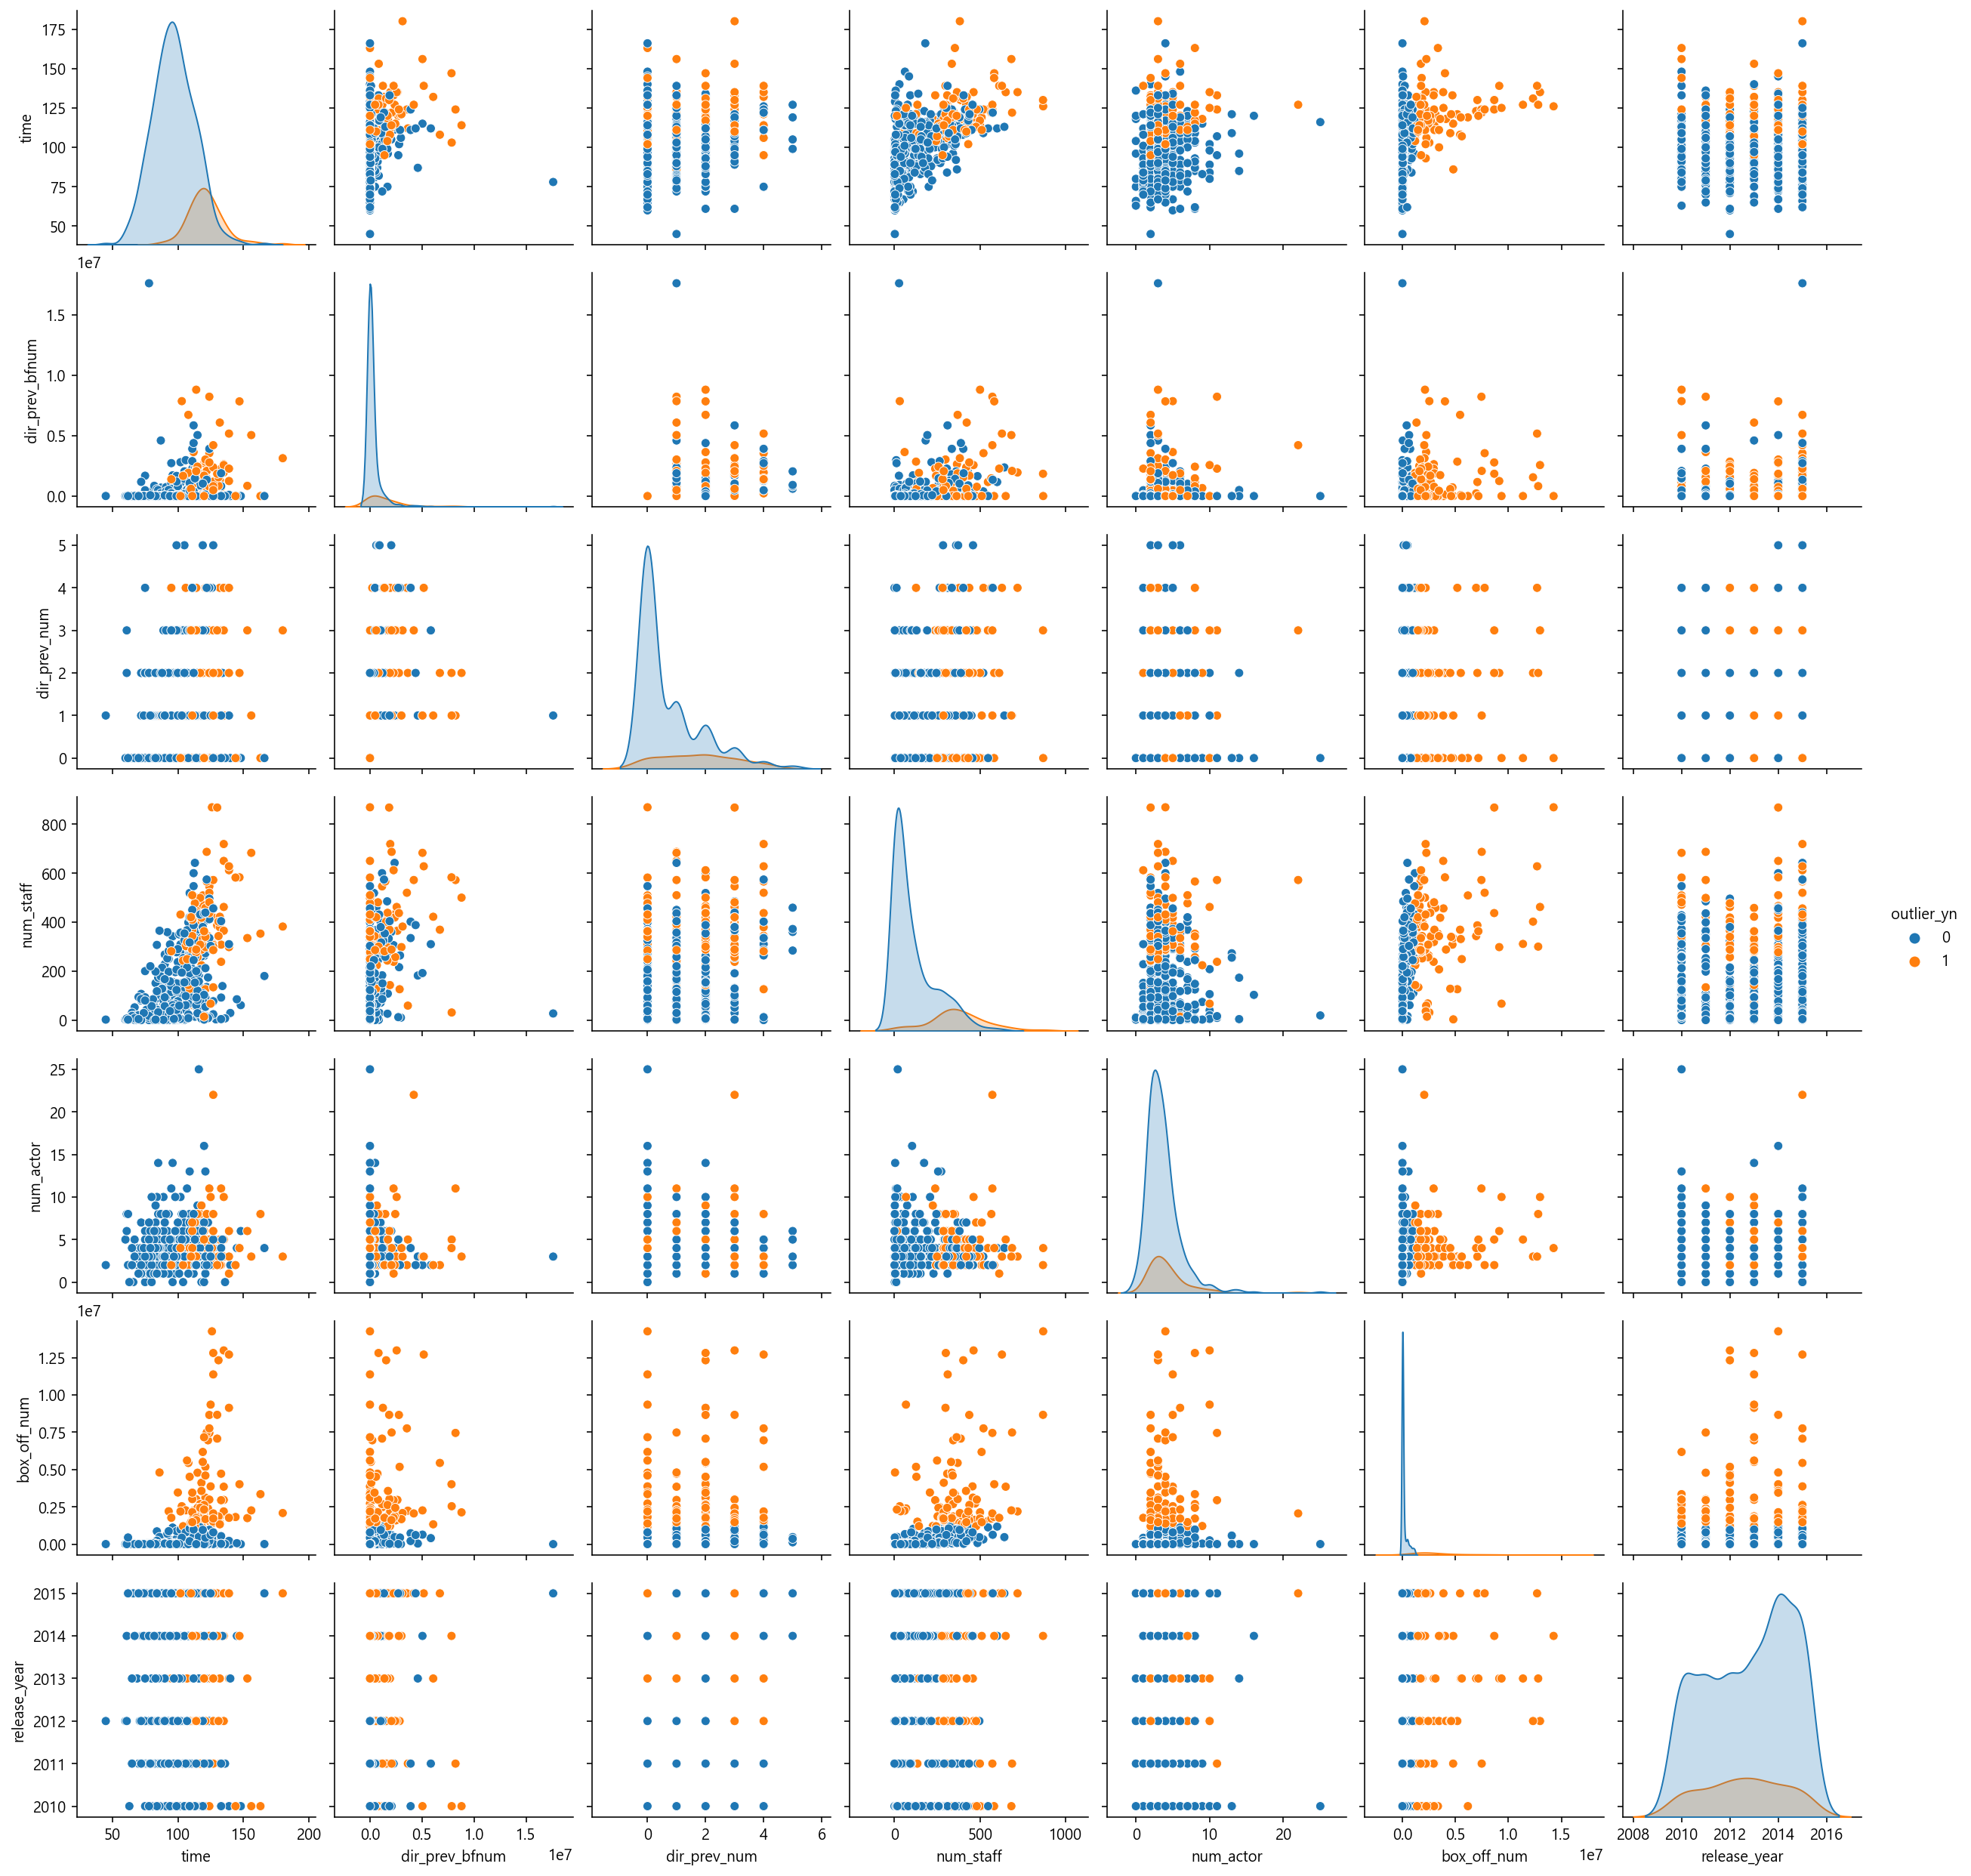

In [39]:
sns.pairplot(df, hue='outlier_yn')

- 데뷔작 여부
    - 데뷔작 인경우 상영시간이 살짝 더 짧다. -> 이런거 다 가설검정 해야하나?
    - 데뷔작인 경우 스태프수는 peak가 하나인데, 데뷔작이 아닌경우는 peak가 2개다
    

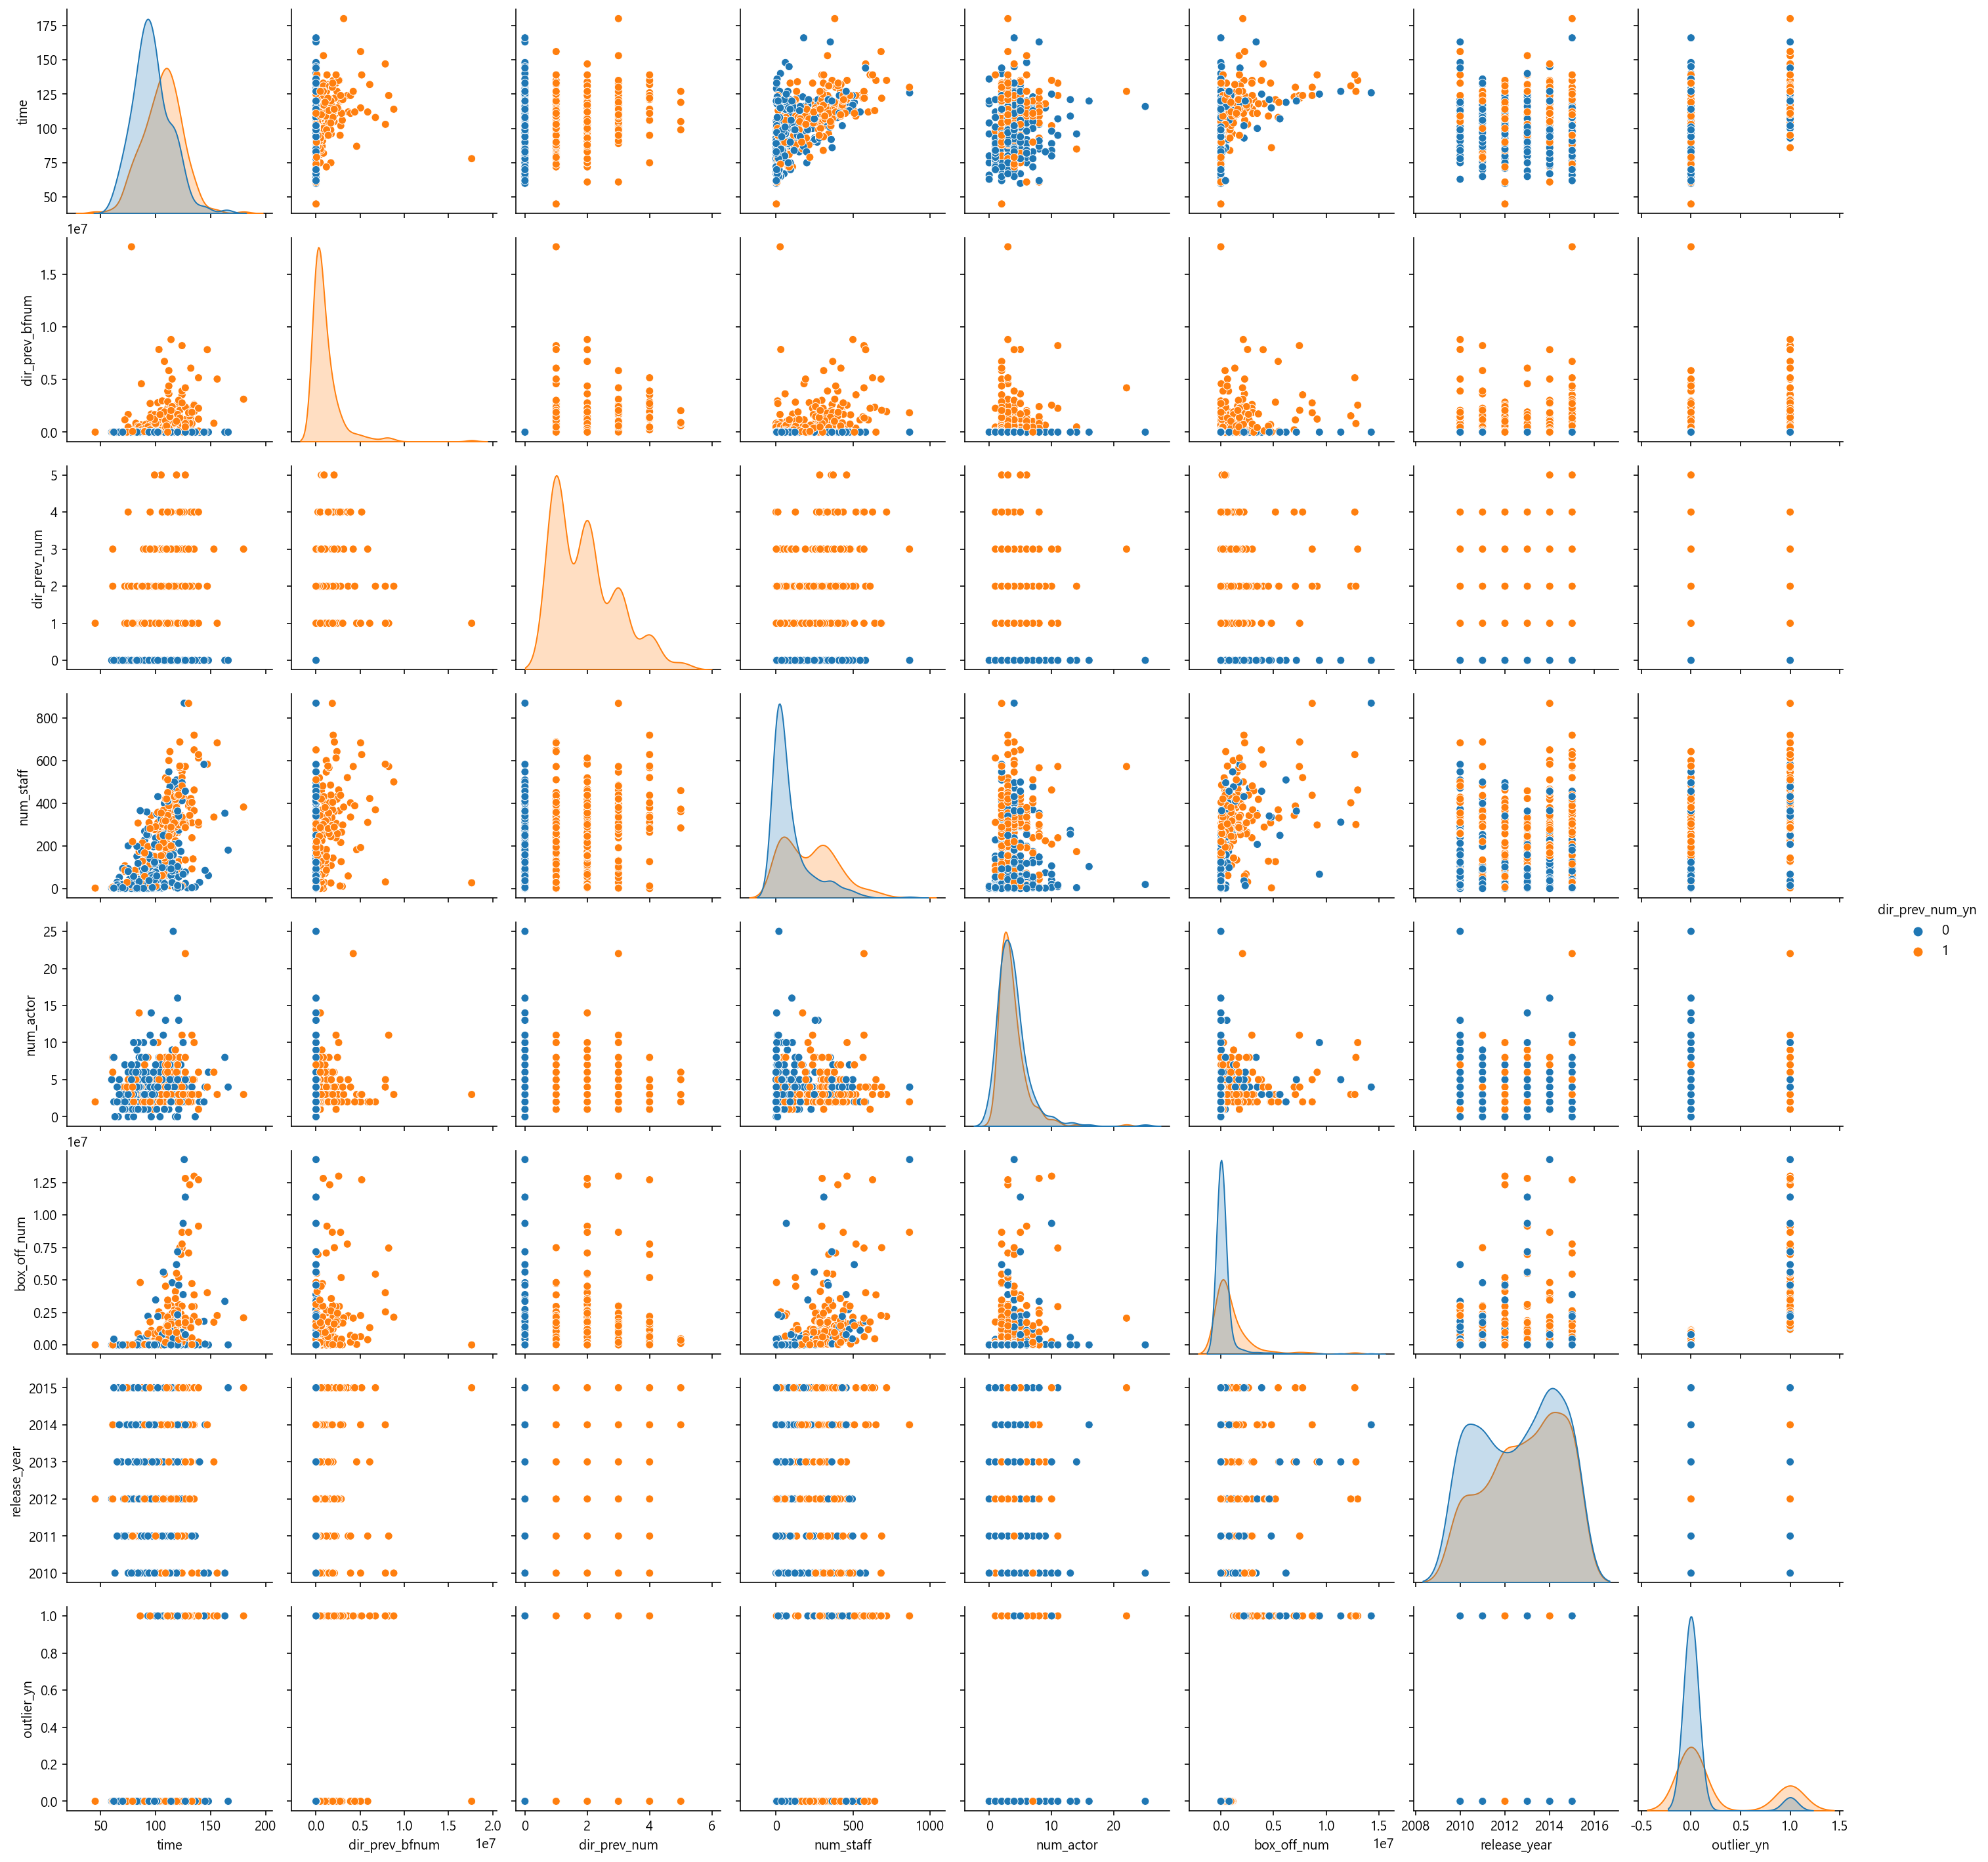

In [166]:
sns.pairplot(df, hue='dir_prev_num_yn')

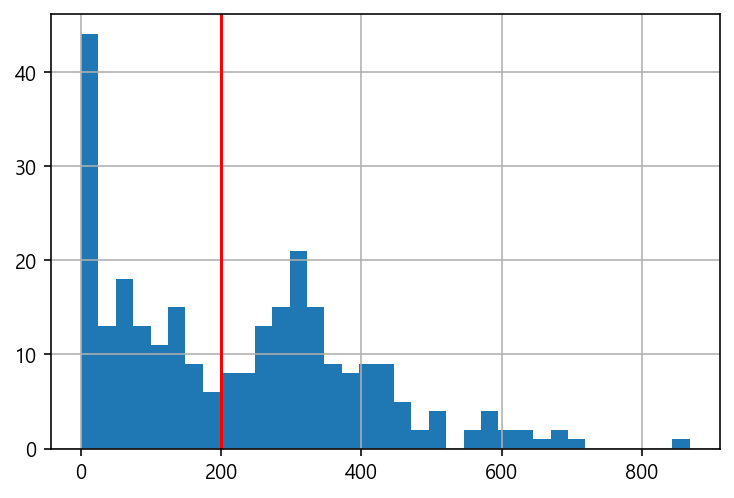

In [191]:
# 200
df[df['dir_prev_num_yn']==1].sort_values('num_staff')['num_staff'].hist(bins=35)
plt.axvline(x=200, color='r')

<AxesSubplot:>

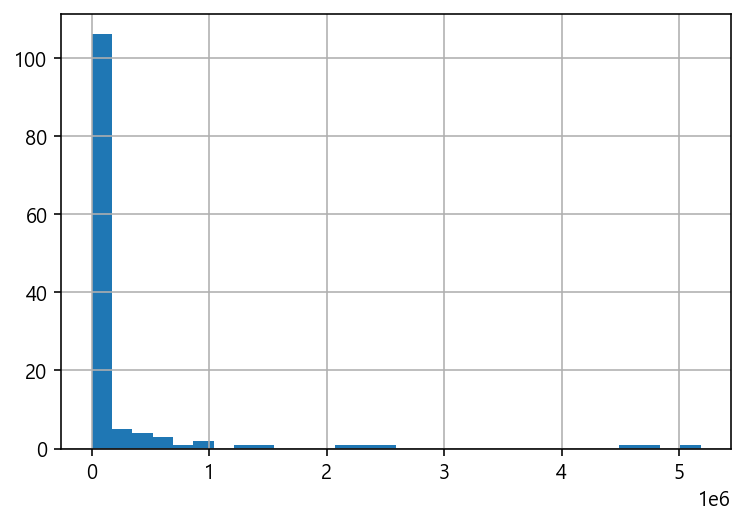

In [203]:
# staff 200명 이하
cond1 = df['dir_prev_num_yn']==1
cond2 = df['num_staff'] < 200
df[cond1 & cond2]['box_off_num'].hist(bins=30)

<AxesSubplot:>

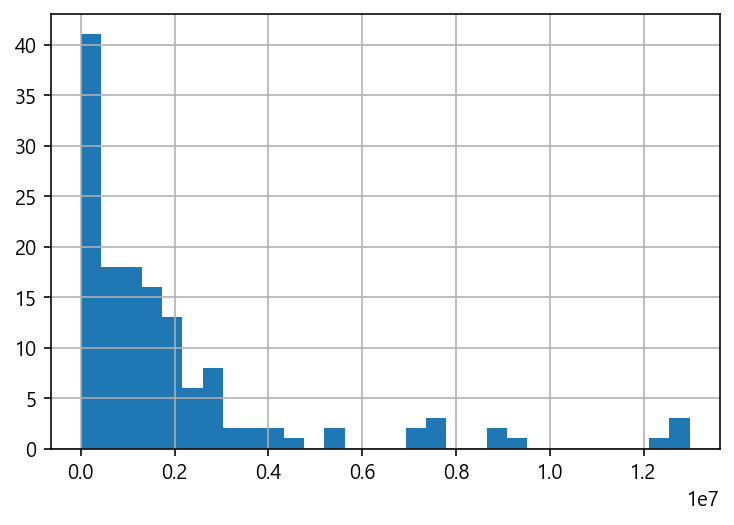

In [202]:
df[cond1 & ~cond2]['box_off_num'].hist(bins=30)

<AxesSubplot:xlabel='release_year'>

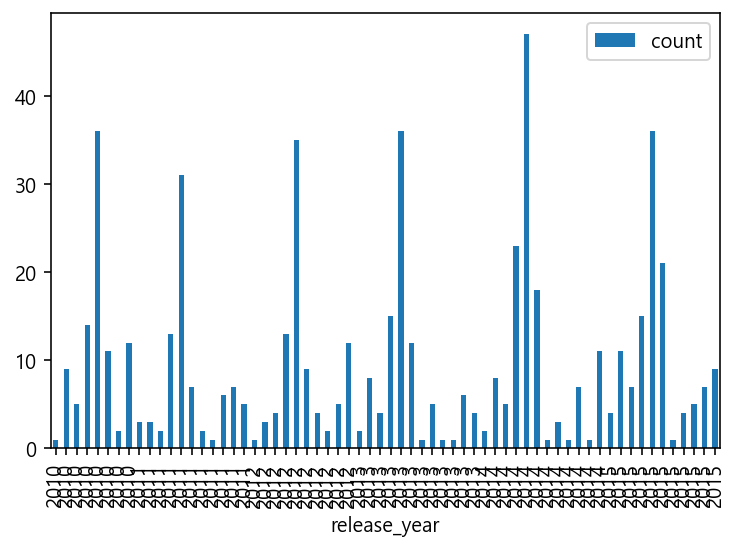

In [185]:
grouped.plot(x='release_year',kind='bar', stacked=True)

- 히트맵
    - box_off_num
        - vs num_staff : 0.54
        - vs time : 0.44

<AxesSubplot:>

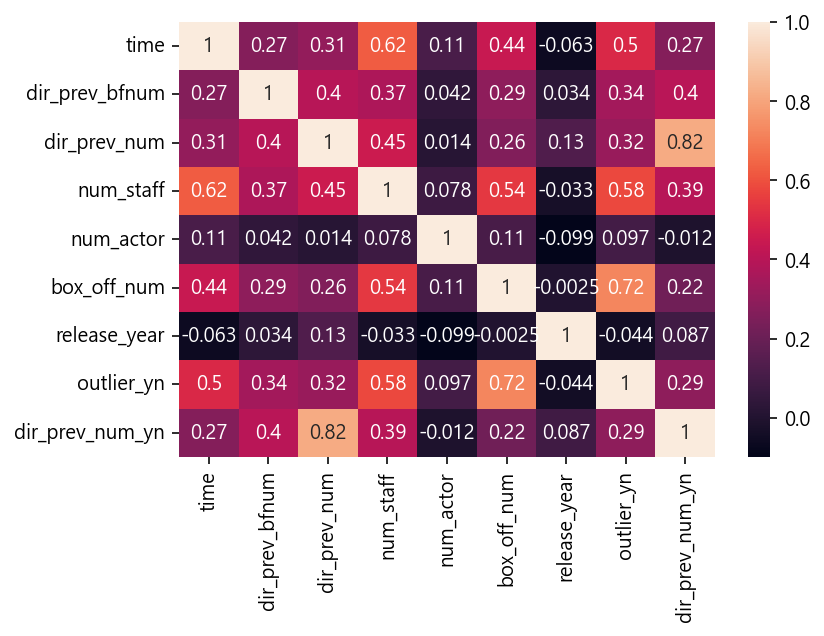

In [172]:
sns.heatmap(df.corr(), annot=df.corr())

- 영화상영시간이 길면 상대적으로 스태프수가 많아지는 경향을 보이나?

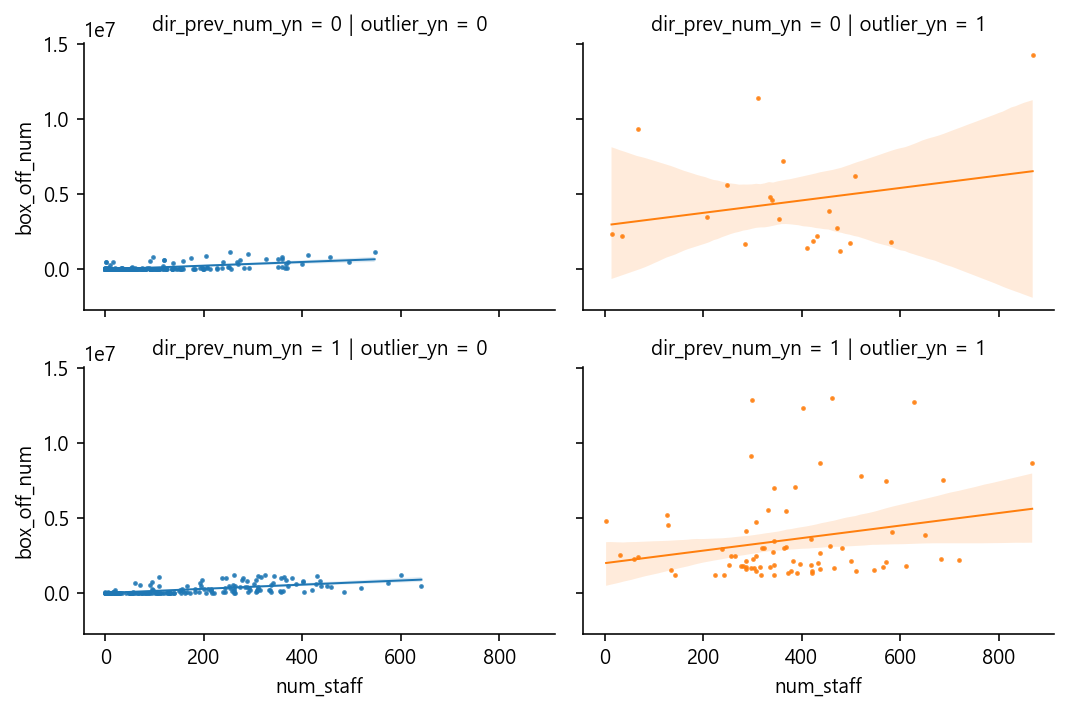

In [174]:
y = 'box_off_num'
x = 'num_staff'

sns.lmplot(y=y, x=x, data=df, 
           col='outlier_yn', row='dir_prev_num_yn',
           hue='outlier_yn', 
           height=2.5, aspect=1.5, 
           scatter_kws={"s": 2}, line_kws={'lw':1})

In [ ]:
y = 'num_staff'
x = 'time'

sns.lmplot(y=y, x=x, data=df, 
           col='outlier_yn', row='dir_prev_num_yn',
           hue='outlier_yn', 
           height=2.5, aspect=1.5, 
           scatter_kws={"s": 2}, line_kws={'lw':1})

In [44]:
grouped = df.groupby(['release_year','genre']).agg('size')
grouped = grouped.reset_index(name='count')
grouped.head()

,release_year,genre,count
0,2010,SF,1
1,2010,공포,9
2,2010,느와르,5
3,2010,다큐멘터리,14
4,2010,드라마,36


<AxesSubplot:xlabel='release_year'>

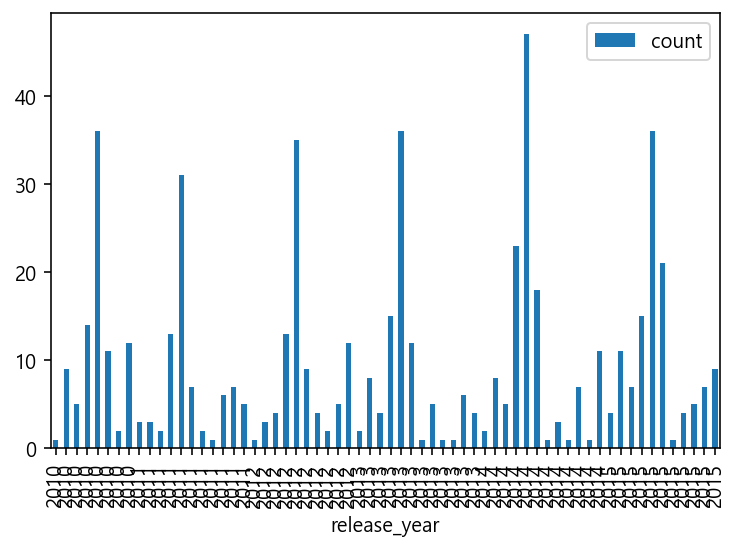

In [45]:
grouped.plot(x='release_year',kind='bar', stacked=True)

<AxesSubplot:xlabel='release_year'>

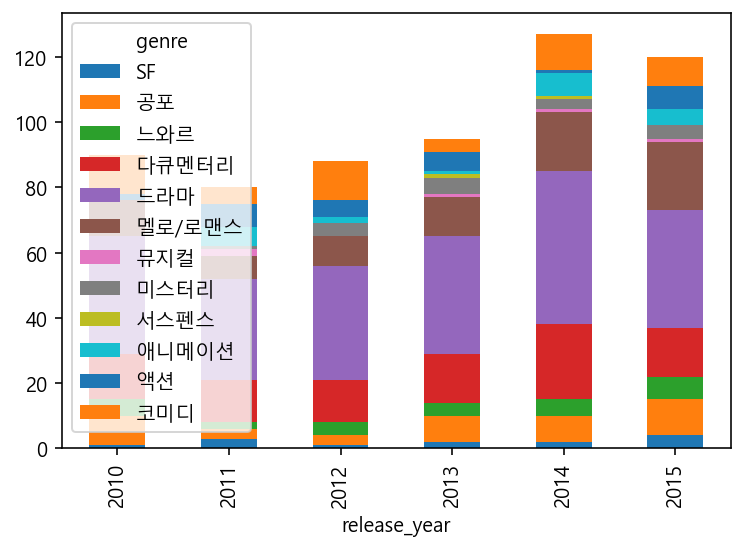

In [46]:
df_pv = pd.pivot_table(grouped, values='count', index='release_year', columns='genre')
df_pv.plot(kind='bar',stacked=True)

- genre 종류좀 줄이면 좋겠다.
    - top4 + 기타 총 5개 항목

In [47]:
df.value_counts('genre')

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
dtype: int64

In [48]:
# 상위 4개 이외는 기타로 만들자
g_list = ['드라마','다큐멘터리','멜로/로맨스','코미디']
df['s_genre'] = np.where(df['genre'].isin(g_list),df['genre'], '기타')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,outlier_yn,s_genre
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,0,기타
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,1,기타
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,1,기타
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866,2012,0,코미디
4,불량남녀,쇼박스미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387,2010,0,코미디


In [57]:
grouped = df.groupby(['release_year','s_genre']).agg('size')
grouped = grouped.reset_index(name='count').sort_values(['release_year','count'], ascending=[True, False])
grouped.head()

,release_year,s_genre,count
2,2010,드라마,36
0,2010,기타,17
1,2010,다큐멘터리,14
4,2010,코미디,12
3,2010,멜로/로맨스,11


In [68]:
df_pv = pd.pivot_table(grouped, values='count', index='release_year', columns='s_genre')
df_pv = df_pv[['드라마','다큐멘터리','멜로/로맨스','코미디','기타']]
df_pv

s_genre,드라마,다큐멘터리,멜로/로맨스,코미디,기타
release_year,,,,,
2010,36,14,11,12,17
2011,31,13,7,5,24
2012,35,13,9,12,19
2013,36,15,12,4,28
2014,47,23,18,11,28
2015,36,15,21,9,39


- 좋은 시각화는 아닌거 같다 한눈에 안들어온다

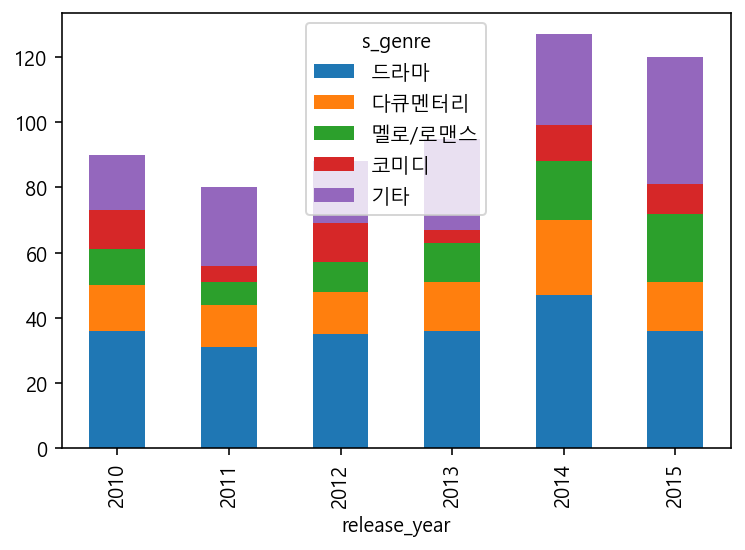

In [177]:
df_pv.plot(kind='bar',stacked=True)
plt.show()

- 흥행작 그룹에는 다큐멘터리가 많이 없다. 

In [50]:
df[df['outlier_yn']==0].value_counts('genre')

genre
드라마       191
다큐멘터리      92
멜로/로맨스     67
코미디        41
공포         36
애니메이션      20
미스터리       15
액션         15
느와르        10
SF          9
뮤지컬         5
서스펜스        2
dtype: int64

In [51]:
df[df['outlier_yn']==1].value_counts('genre')

genre
드라마       30
느와르       17
액션        13
코미디       12
멜로/로맨스    11
공포         6
SF         4
미스터리       2
다큐멘터리      1
애니메이션      1
dtype: int64

In [52]:
df[df['num_staff']>=800]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,outlier_yn,s_genre
372,국제시장,CJ엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.00000,0,869,4,14262766,2014,1,드라마
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1843894.66667,3,868,2,8666208,2014,1,기타
